In [77]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [78]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

In [1]:
import pandas as pd

In [3]:
orders = pd.read_csv('./data/Orders.csv')

In [4]:
returns = pd.read_csv('./data/Returns.csv')

### Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [14]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [17]:
orders.Profit.head()

0      $62.15
1    -$288.77
2     $919.97
3     -$96.54
4     $311.52
Name: Profit, dtype: object

In [18]:
orders.Profit = orders.Profit.replace('[\$,]', '', regex=True).astype(float)

orders.Sales = orders.Sales.replace('[\$,]', '', regex=True).astype(float)

In [21]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [22]:
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

In [99]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Season
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11,3_fall
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2,4_winter
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10,3_fall
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1,4_winter
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11,3_fall


In [98]:
pd.set_option('display.max_columns', None)

In [92]:
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

def month_to_season(month):
    if month in [3,4,5]:
        month = '1_spring'
    elif month in [6,7,8]:
        month = '2_summer'
    elif month in [9,10,11]:
        month = '3_fall'
    else:
        month = '4_winter'
    return(month)

orders['Season'] = orders.Month.apply(month_to_season)

In [36]:
orders.tail()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Season
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,6,summer
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,5,spring
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,8,summer
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,2,winter
51289,6147,MX-2013-MC1810093-41416,5/22/13,5/26/13,Second Class,MC-1810093,Mick Crebagga,Consumer,NaN,Tipitapa,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.38,3,0.0,1.80,1.002,High,5,spring


In [37]:
orders.Season.describe()

count     51290
unique        4
top        fall
freq      16825
Name: Season, dtype: object

In [38]:
orders.groupby('Season').aggregate("count")

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month
Season,,,,,,,,,,,,,,,,,,,,,
fall,16825,16825,16825,16825,16825,16825,16825,16825,3672,16825,...,16825,16825,16825,16825,16825,16825,16825,16825,16825,16825
spring,9826,9826,9826,9826,9826,9826,9826,9826,2094,9826,...,9826,9826,9826,9826,9826,9826,9826,9826,9826,9826
summer,13562,13562,13562,13562,13562,13562,13562,13562,2121,13562,...,13562,13562,13562,13562,13562,13562,13562,13562,13562,13562
winter,11077,11077,11077,11077,11077,11077,11077,11077,2107,11077,...,11077,11077,11077,11077,11077,11077,11077,11077,11077,11077


In [103]:
season_quantity = orders.groupby(['Season']).agg({"Quantity": 'sum'})


season_quantity 

,Quantity
Season,
1_spring,34052
2_summer,46651
3_fall,59161
4_winter,38448


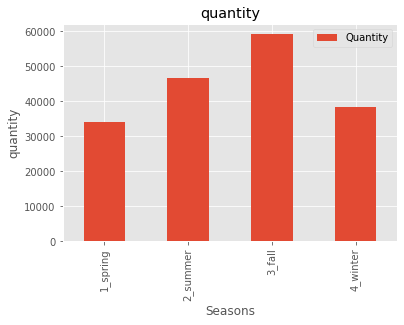

In [107]:
season_quantity.plot.bar()
plt.title('quantity')
plt.xlabel('Seasons')
plt.ylabel('quantity')
plt.show()

In [100]:
season_category = orders.groupby(['Season', 'Category']).agg({'Row.ID': "count",'Profit':'sum', "Quantity": 'sum'})

In [101]:
season_category

Row.ID     Profit  Quantity
Season   Category                                    
1_spring Furniture          1856   41635.46      6587
         Office Supplies    6054  104256.93     20844
         Technology         1916  126773.70      6621
2_summer Furniture          2488   63350.29      8650
         Office Supplies    8381  136797.00     28649
         Technology         2693  175576.04      9352
3_fall   Furniture          3347  113388.94     11905
         Office Supplies   10170  163654.58     35686
         Technology         3308  227549.67     11570
4_winter Furniture          2169   66707.93      7750
         Office Supplies    6684  113886.33     23065
         Technology         2224  133879.80      7633

In [95]:
Furniture = orders["Category"]=='Furniture'
test_f = orders[Furniture]
Technology = orders["Category"]=='Technology'
test_t = orders[Technology]
Office_Supplies = orders["Category"]=='Office Supplies'
test_os = orders[Office_Supplies]

In [96]:
test_category = pd.DataFrame({'Office Supplies':test_os.Season.value_counts(),'Furniture': test_f.Season.value_counts(), 'Technology': test_t.Season.value_counts()})

test_category




,Office Supplies,Furniture,Technology
3_fall,10170,3347,3308
2_summer,8381,2488,2693
4_winter,6684,2169,2224
1_spring,6054,1856,1916


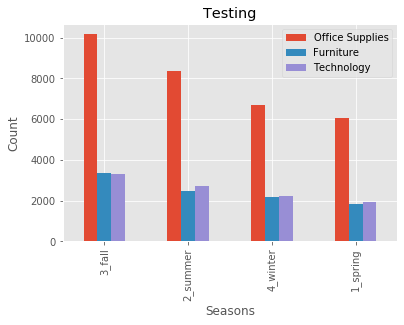

In [97]:
test_category.plot.bar()
plt.title('Testing')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()